In [14]:
# Step 1: Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
# Step 2: Explore and Load the dataset
data = load_breast_cancer()
# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column (0 = malignant, 1 = benign)
df['target'] = data.target

# Print the first five rows
print(df.head())



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# Step 3: 
#X is a matrix with 30 features per sample.
#y is a list of labels (0 for malignant, 1 for benign).

X = data.data       # Features (30 columns)
y = data.target     # Labels (0 or 1)


In [4]:
# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print()

In [9]:
# Step 5: Create and train the model

#entropy means the model will use Information Gain to decide how to split.
#It's based on the concept from information theory — lower entropy means more "pure" groups.

#max_depth=4
#This limits the maximum depth of the tree.
#A deeper tree can make more complex decisions but may overfit (learn noise from training data).


model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
# Step 6: Make predictions
y_pred = model.predict(X_test)


In [11]:
# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9532163742690059

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.90      0.93        63
      benign       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



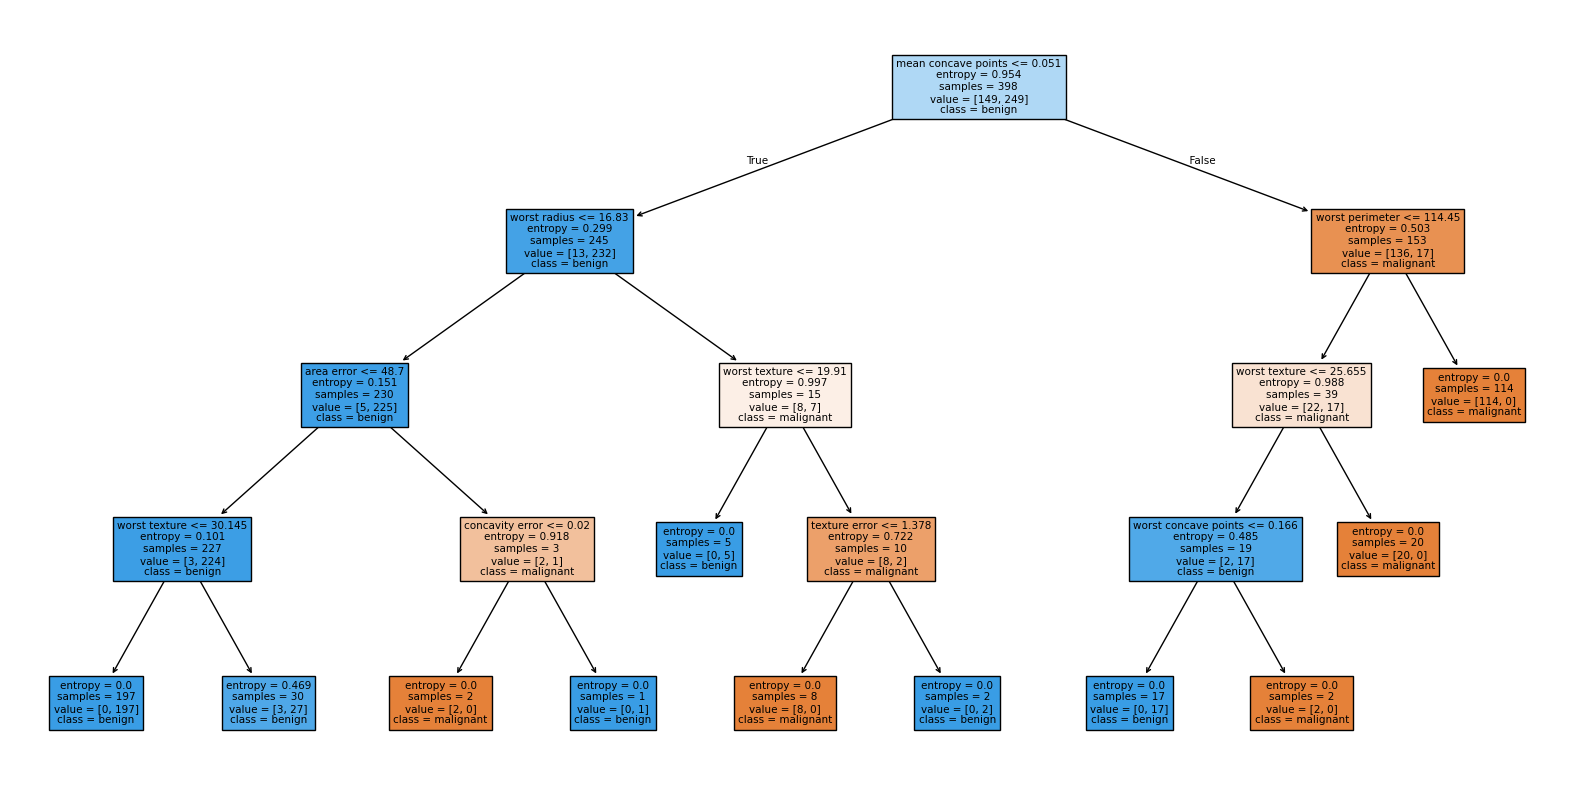

In [12]:
# Step 8: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()
